## EDA For Financial Stock Market

In [79]:


# Install required libraries (run this in a terminal or as a cell if needed)
# !pip install pandas numpy matplotlib seaborn nltk scikit-learn

# Import necessary libraries

# Import libraries
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from scripts.publication_analysis import *
from scripts.sentiment_analysis import SentimentAnalyzer as sa
from scripts.fetch_stock_data import fetch_historical_data
from scripts.financial_analysis import *

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Add the parent directory (benin_eda_project/) to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)






## 
from src.data_loader import load_data
from src.data_analyzer import get_summary_statistics  #,convert_timestamp


# Debug: Print current working directory and Python path
print('Current working directory:', os.getcwd())
print('Python path:', sys.path)

Current working directory: e:\KAIM\KAIM-week1\notebooks
Python path: ['C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\Naod.Amare\\AppData\\Local\\Programs\\Python\\Python313', 'e:\\KAIM\\KAIM-week1\\venv', '', 'e:\\KAIM\\KAIM-week1\\venv\\Lib\\site-packages', 'e:\\KAIM\\KAIM-week1\\venv\\Lib\\site-packages\\win32', 'e:\\KAIM\\KAIM-week1\\venv\\Lib\\site-packages\\win32\\lib', 'e:\\KAIM\\KAIM-week1\\venv\\Lib\\site-packages\\Pythonwin', 'e:\\KAIM\\KAIM-week1', 'e:\\KAIM\\KAIM-week1', 'e:\\KAIM\\KAIM-week1', 'e:\\KAIM\\KAIM-week1', 'e:\\KAIM\\KAIM-week1\\venv\\Lib\\site-packages\\setuptools\\_vendor', 'e:\\KAIM\\KAIM-week1', 'e:\\KAIM\\KAIM-week1', 'e:\\KAIM\\KAIM-week1']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naod.Amare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naod.Amare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Naod.Amare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Extract

In [71]:
# Load data
file_path = os.path.join('..', 'data', 'raw_analyst_ratings.csv')
df = load_data(file_path)
df.head()

2025-06-03 22:03:01,037 - INFO - Successfully loaded data from ..\data\raw_analyst_ratings.csv with 1407328 rows


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [16]:
# Summary statistics
print("Summary Statistics:")
stats = get_summary_statistics(df)
print(stats)

2025-05-30 20:15:21,278 - INFO - Computed summary statistics


Summary Statistics:
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06


In [17]:
# Data type identification
print("\nData Type Identification:")
print(df.dtypes)


Data Type Identification:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object


In [18]:
#fix data type issue

df['date'] = pd.to_datetime(df['date'], format='ISO8601')

print("\nData Type Identification:")
print(df.dtypes)


Data Type Identification:
Unnamed: 0                        int64
headline                         object
url                              object
publisher                        object
date          datetime64[ns, UTC-04:00]
stock                            object
dtype: object


In [19]:
# 2. Count the number of articles per publisher (Top 10)
publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher (Top 10):")
print(publisher_counts.head(10))


Number of Articles per Publisher (Top 10):
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


## Descriptive analysis

In [20]:
# 1. Headline Length Statistics
print("Headline Length Statistics:")
print(df['headline'].describe())

Headline Length Statistics:
count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object


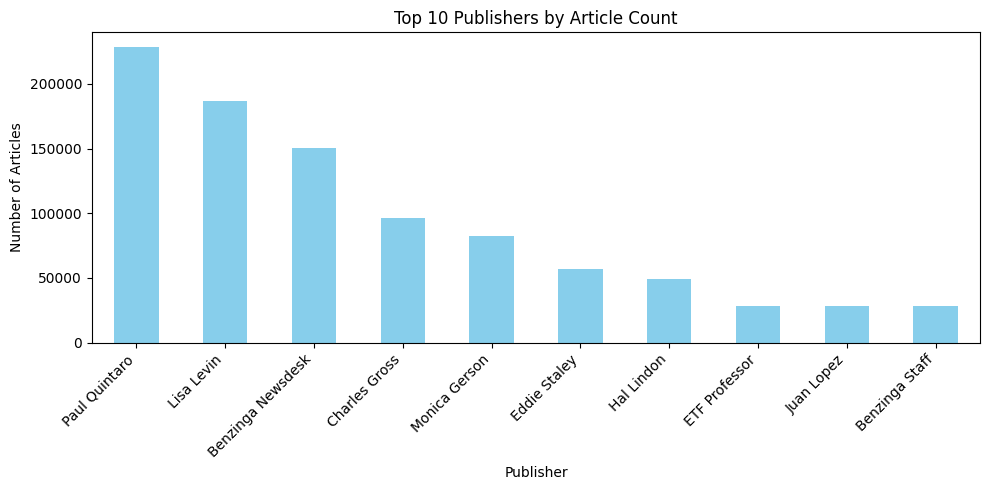

In [21]:
# Plot the top 10 publishers
plt.figure(figsize=(10, 5))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

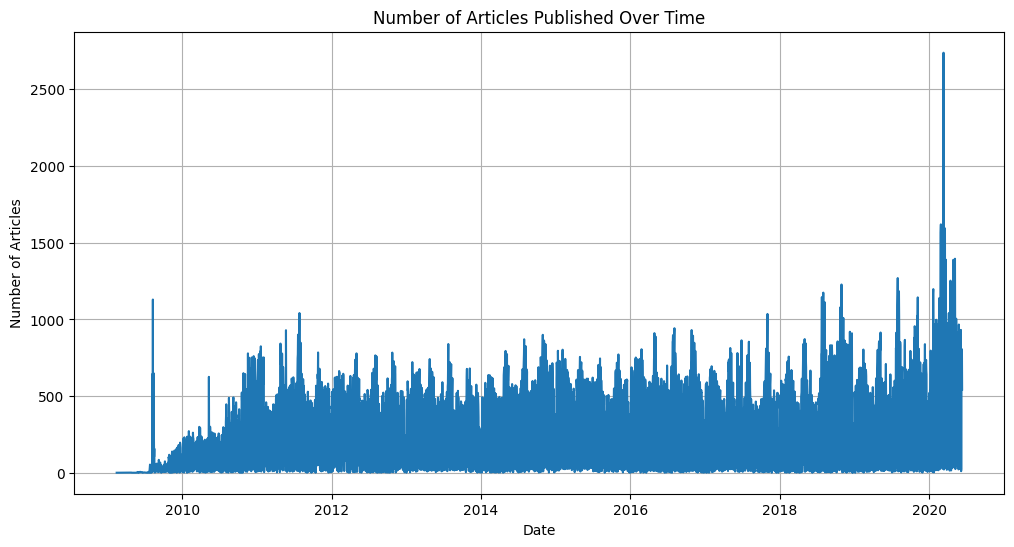

In [22]:
# 3. Analyze publication dates to see trends over time
df['date_only'] = df['date'].dt.date
daily_counts = df.groupby('date_only').size()
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid()
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naod.Amare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naod.Amare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Naod.Amare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


=== Text Analysis/Topic Modeling ===
Top 20 Keywords in Headlines:
['announces' 'benzinga' 'buy' 'company' 'downgrade' 'earnings' 'eps' 'est'
 'lower' 'market' 'price' 'pt' 'raise' 'report' 'sale' 'share' 'stock'
 'top' 'trading' 'update']


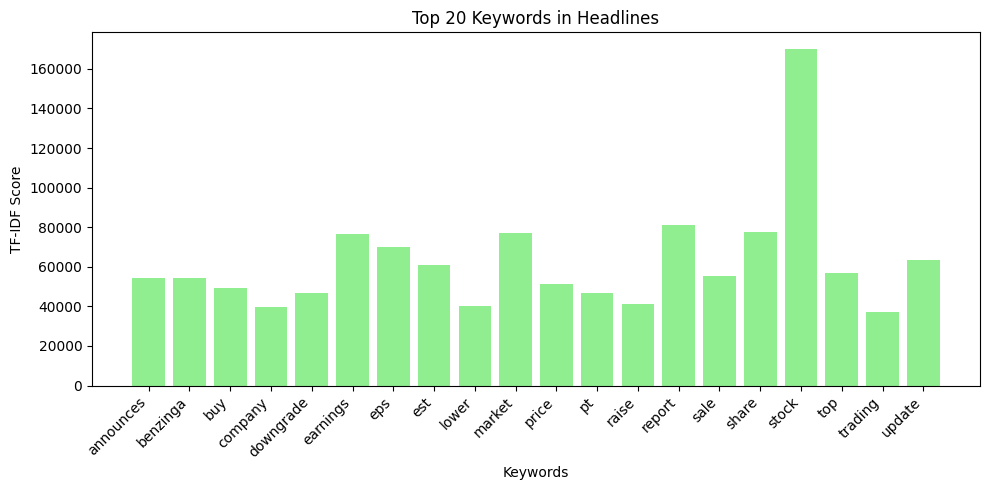

In [28]:
print("\n=== Text Analysis/Topic Modeling ===")

# Preprocess text for analysis
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['processed_headline'] = df['headline'].apply(preprocess_text)

# Use TF-IDF to find common keywords
tfidf = TfidfVectorizer(max_features=20)
tfidf_matrix = tfidf.fit_transform(df['processed_headline'])
keywords = tfidf.get_feature_names_out()
print("Top 20 Keywords in Headlines:")
print(keywords)

# Plot the top keywords
plt.figure(figsize=(10, 5))
plt.bar(keywords, tfidf_matrix.toarray().sum(axis=0), color='lightgreen')
plt.title('Top 20 Keywords in Headlines')
plt.xlabel('Keywords')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


=== Publisher Analysis ===

Top 5 Keywords for Paul Quintaro:
[('v', 75055), ('est', 69701), ('report', 58688), ('eps', 57004), ('sale', 33180)]

Top 5 Keywords for Lisa Levin:
[('stock', 72715), ('market', 41074), ('top', 32811), ('moving', 32324), ('session', 32324)]

Top 5 Keywords for Benzinga Newsdesk:
[('share', 44731), ('trading', 38834), ('company', 33229), ('stock', 33157), ('estimate', 31112)]

Top 5 Keywords for Charles Gross:
[('v', 16665), ('option', 15869), ('alert', 15676), ('call', 12953), ('ask', 12076)]

Top 5 Keywords for Monica Gerson:
[('stock', 30592), ('top', 28358), ('earnings', 19526), ('scheduled', 16625), ('industry', 13853)]

Domain Counts (if publishers are emails):
domain
N/A                   1399240
benzinga                 7937
gmail                     139
andyswan                    5
investdiva                  2
tothetick                   2
eosdetroit                  1
forextraininggroup          1
stockmetrix                 1
Name: count, dtype

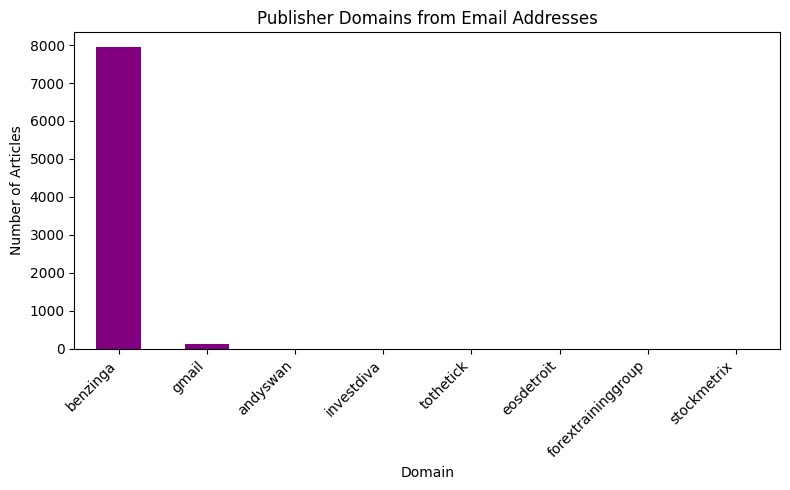

In [29]:
print("\n=== Publisher Analysis ===")
# 2. Differences in news type (keyword analysis per publisher)
top_publishers = publisher_counts.head(5).index
for publisher in top_publishers:
    publisher_headlines = df[df['publisher'] == publisher]['processed_headline']
    all_words = ' '.join(publisher_headlines).split()
    word_counts = Counter(all_words)
    print(f"\nTop 5 Keywords for {publisher}:")
    print(word_counts.most_common(5))

# 3. Extract domains if publishers are email addresses
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[1].split('.')[0] if isinstance(x, str) and '@' in x else 'N/A')
domain_counts = df['domain'].value_counts()
print("\nDomain Counts (if publishers are emails):")
print(domain_counts.head(10))

# Plot domain counts (excluding 'N/A')
domain_counts = domain_counts[domain_counts.index != 'N/A']
if not domain_counts.empty:
    plt.figure(figsize=(8, 5))
    domain_counts.plot(kind='bar', color='purple')
    plt.title('Publisher Domains from Email Addresses')
    plt.xlabel('Domain')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No email-based publishers found.")

In [77]:
# Load data
file_path = os.path.join('..', 'data', 'raw_analyst_ratings.csv')
df = load_data(file_path)
df.head()



2025-06-03 22:23:02,969 - INFO - Successfully loaded data from ..\data\raw_analyst_ratings.csv with 1407328 rows


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [82]:
# Select only 'stock' and 'headline' columns
df = df[ 'headline']

# Perform sentiment analysis
sentiment_df = sa.analyze_sentiment(df)

# Apply sentiment categories
sentiment_df = sa.apply_sentiment_categories(sentiment_df)

# Display the first few rows to verify
print(sentiment_df.head())

                                            headline  neg    neu    pos  \
0            Stocks That Hit 52-Week Highs On Friday  0.0  1.000  0.000   
1         Stocks That Hit 52-Week Highs On Wednesday  0.0  1.000  0.000   
2                      71 Biggest Movers From Friday  0.0  1.000  0.000   
3       46 Stocks Moving In Friday's Mid-Day Session  0.0  1.000  0.000   
4  B of A Securities Maintains Neutral on Agilent...  0.0  0.833  0.167   

   compound Sentiment  
0     0.000   Neutral  
1     0.000   Neutral  
2     0.000   Neutral  
3     0.000   Neutral  
4     0.296  Positive  


In [40]:
# Save the sentiment analysis result into csv for correlation analysis
# with stock market movements
sentiment_df.to_csv('../data/sentiment.csv')

In [47]:
# extract multiple datasets  and concatenate in one dataset for analysis
# List of stocks
stocks = ['AAPL','AMZN','GOOG','META', 'MSFT', 'NVDA','TSLA']
# Fetch historical data for list of stocks

 # Fetch data for AAPL, GOOGL, and MSFT, etc
df_stock = fetch_historical_data(stocks, start_date='2020-01-01', end_date='2023-01-01')
    
# Explore the results
df_stock.head()

,Open,High,Low,Close,Volume,stock
Date,,,,,,
2022-12-30,126.933,128.457,125.967,128.437,77929881.0,AAPL
2022-12-29,126.519,128.981,126.262,128.120,76583912.0,AAPL
2022-12-28,128.180,129.522,124.423,124.591,86431778.0,AAPL
2022-12-27,129.869,129.899,127.240,128.536,69810179.0,AAPL
2022-12-23,129.414,130.893,128.150,130.345,64556865.0,AAPL


#### Sentiment Distribution of Headlines

Sentiment
Neutral     741194
Positive    441858
Negative    224276
Name: count, dtype: int64


C:\Users\Naod.Amare\AppData\Local\Temp\ipykernel_5772\4208328684.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_text = f'{percentages[i]:.1f}%'


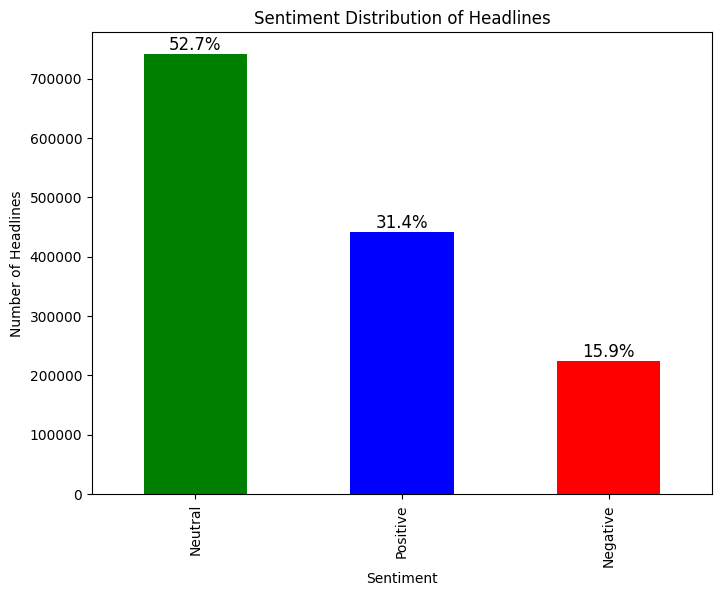

In [33]:
# Summary of sentiment distribution
sentiment_distribution = sentiment_df['Sentiment'].value_counts()
print(sentiment_distribution)

total = sentiment_distribution.sum()  # Calculate the total number of headlines
percentages = (sentiment_distribution / total) * 100  # Calculate percentages

# Optional: Plot the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])

# Add percentage annotations on top of each bar
for i, bar in enumerate(bars.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the percentage and format it
    percentage_text = f'{percentages[i]:.1f}%'
    # Position the text at the end of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, percentage_text, 
             ha='center', va='bottom', fontsize=12)

# Set titles and labels
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')

# Display the plot
plt.show()


The majority of the headlines (52.7%) are neutral in tone, indicating that much of the financial news is factual or balanced without a strong positive or negative bias. A significant portion (31.4%) of the headlines convey a positive sentiment, suggesting that there is a relatively optimistic outlook in the news. Meanwhile, a smaller percentage (15.9%) of the headlines are negative, reflecting less frequent instances of pessimism or unfavorable news.

Overall, the sentiment distribution shows that financial news tends to be more neutral or positive, with fewer headlines expressing negativity. This could be indicative of the media's focus on positive financial developments or the general market conditions during the analyzed period.

Identify common keywords or phrases
Here are the steps to identify common kewords or phrases

Text Preprocessing:

Clean and prepare the text data by removing stopwords, punctuation, and other noise.
Tokenization:

Break down the text into individual words or phrases.
Frequency Analysis:

Calculate the frequency of each word or phrase to identify the most common ones.
Topic Modeling (Optional):

Use algorithms like Latent Dirichlet Allocation (LDA) to identify underlying topics in the headlines.


#### Time Series Analysis
##### Analzye annual or quartley trends

e:\KAIM\KAIM-week1\scripts\publication_analysis.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  annual_counts = data.groupby(data['date'].dt.to_period('Y')).size().reset_index(name='no_of_articles')
e:\KAIM\KAIM-week1\scripts\publication_analysis.py:33: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  quarterly_counts = data.groupby(data['date'].dt.to_period('Q')).size().reset_index(name='no_of_articles')


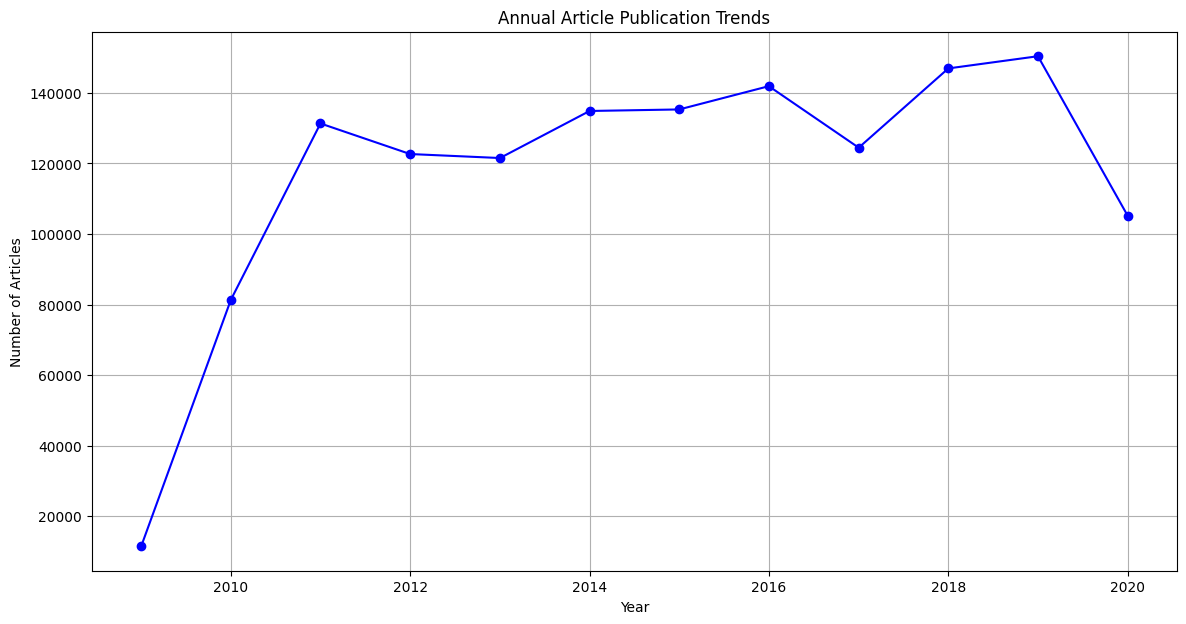

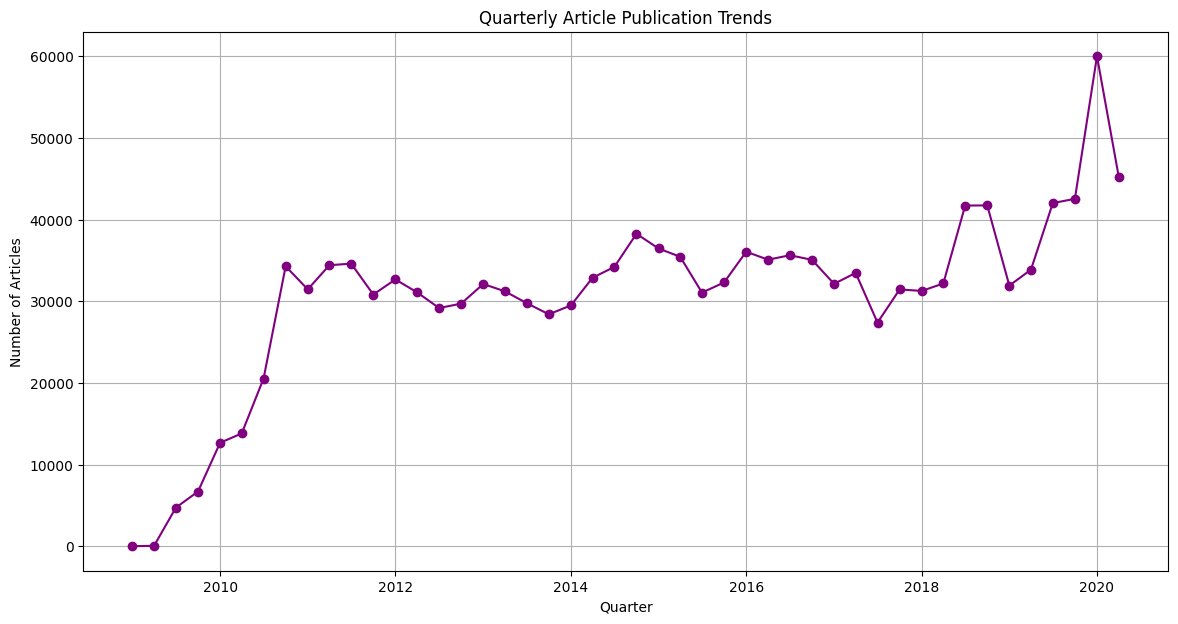

In [37]:
annual_counts = analyze_annual_trends(df)
quarterly_counts = analyze_quarterly_trends(df)

# Plot the long-term trends
plot_long_term_trends(annual_counts, quarterly_counts)

The graph shows that the annual trend in article publications from 2010 to 2020. There is a notable increase in the number of articles published over this decade, particularly between 2010 and 2012, where the publication frequency surged. However, a slight decline is observed in the later years, specifically in 2019 and 2020, indicating a possible slowdown in article production during this period.

#### Decomposition

In [38]:
decomposed = sm.tsa.seasonal_decompose(annual_counts['no_of_articles'], model='additive', period=6)

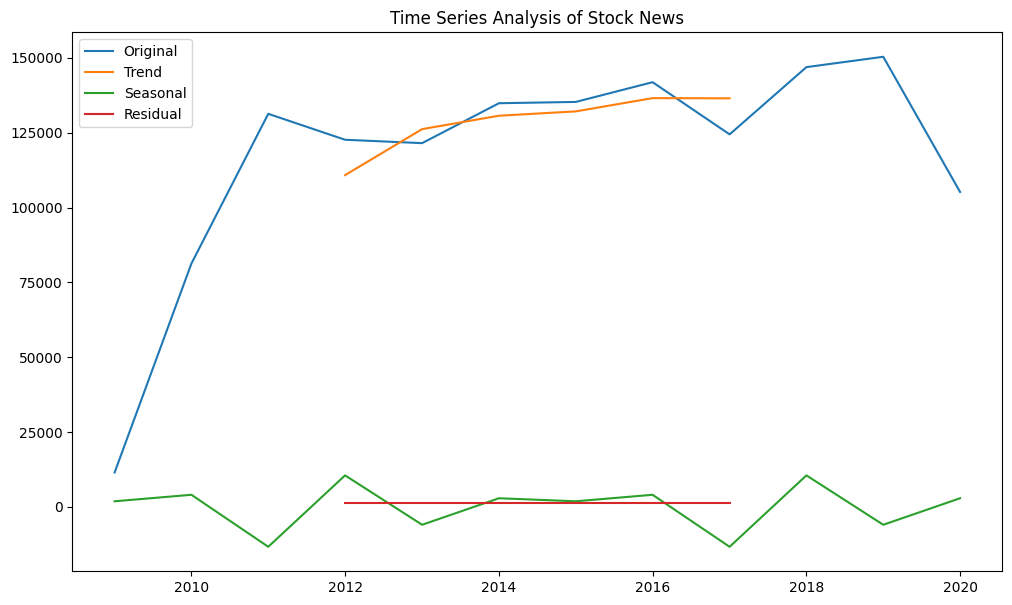

In [39]:
plt.figure(figsize=(12, 7))
# plot the original data
plt.plot(annual_counts['date'], annual_counts['no_of_articles'], label='Original')
# plot the trend
plt.plot(annual_counts['date'], decomposed.trend, label='Trend')
# plot the seasonal
plt.plot(annual_counts['date'], decomposed.seasonal, label='Seasonal')
# plot residual
plt.plot(annual_counts['date'], decomposed.resid, label='Residual')
plt.title('Time Series Analysis of Stock News')
plt.legend()
plt.show()

According to the decomposition of the above plot here's the summary:

Trend: The trend component shows a consistent upward trajectory, indicating a steady increase in the volume or impact of stock news over time. This suggests that the frequency or importance of stock news has generally grown over time.

Seasonality: The seasonal component is relatively flat, suggesting no significant recurring patterns, meaning stock news is not strongly influenced by predictable seasonal factors.

Residual: The residual component, with variations close to zero, indicates that the remaining fluctuations are largely random and unpredictable.

In general, the time series decomposition of stock news suggests that the observed increase in news volume or impact is primarily driven by a long-term upward trend. There is no strong evidence of seasonal patterns affecting the data, and the residual variations are likely due to random noise or other factors not captured by the trend and seasonal components. This analysis highlights the growing significance of stock news over time, without clear seasonal influences.